In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# Generating random dataset
X_train = np.random.rand(1000,20)
y_train = np.random.randint(0,1, size=(1000,1))

In [15]:
model = models.Sequential([
    layers.Dense(64,activation='relu', input_shape=(20,)),
    layers.Dense(1,activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
#compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
#custom callbakc to capture mini-batch loss after eah batch
class BatchLossHistory(tf.keras.callbacks.Callback):
  def on_train_batch_end(self,batch, logs=None):
    self.losses.append(logs['loss'])


  def on_epoch_begin(self, epoch, logs=None):
    self.losses = []

In [21]:
#initialize the custom callback
batch_loss_history = BatchLossHistory()

In [22]:
#train the model ans capture batch-wise loss values
history = model.fit(X_train, y_train, epochs=10, batch_size=32, callbacks=[batch_loss_history], verbose=1)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7606 - loss: 0.5352
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0911
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0291
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0156
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0099
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0065
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0049
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0038
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0030
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0026


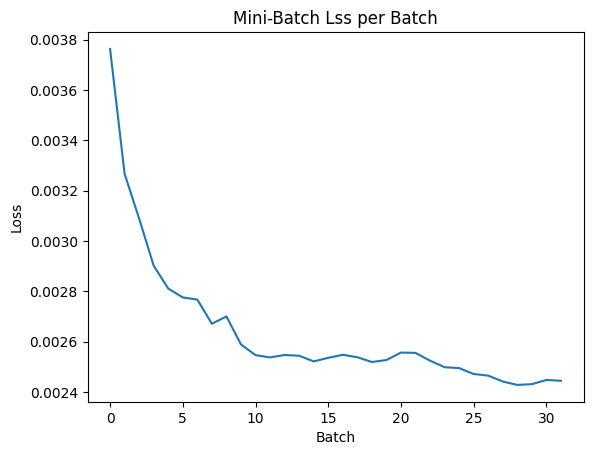

In [23]:
plt.plot(batch_loss_history.losses)
plt.xlabel('Batch')
plt.ylabel('Loss')
plt.title('Mini-Batch Lss per Batch')
plt.show()